## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.


Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.

# Dataset B

In [1]:
#pandas, numpy, matplotlib, sklearn libraries were used here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('data_prob3_partb.csv')
from sklearn.model_selection import train_test_split
df.columns
df.head()

,Input feature 1,Input feature 2,Output label
0,0.95800,-0.575,1.0
1,0.00799,0.140,1.0
2,1.38000,-0.551,1.0
3,-0.36300,0.960,0.0
4,0.46000,0.701,0.0


In [2]:
#Here X is the input parameter and Y output parameter converted into array.
X=df[['Input feature 1', 'Input feature 2']]
Y=df['Output label']

In [3]:
#Test and train data sets are splitted using train_test_split.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.75,random_state=66)

In [4]:
#This are the index values.
Columns=df.columns
Columns

Index(['Input feature 1', 'Input feature 2', 'Output label'], dtype='object')

In [5]:
#This give the unique value of the output labels.
Length=len(df['Output label'])
df['Output label'].unique()

array([1., 0.])

In [6]:
bycomp=df.groupby('Output label')
bycomp.count()

,Input feature 1,Input feature 2
Output label,,
0.0,750,750
1.0,750,750


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

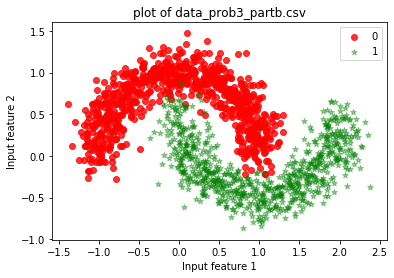

In [7]:
#This the given data plot of 'data_prob3_partb.csv'
plt.scatter(df['Input feature 1'][df['Output label']==0.0], df['Input feature 2'][df['Output label']==0.0],color='red',marker='o',alpha=0.8,label='0')
plt.scatter(df['Input feature 1'][df['Output label']==1.0], df['Input feature 2'][df['Output label']==1.0],color='green',marker='*',alpha=0.4,label='1')
plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')
plt.title('plot of data_prob3_partb.csv')
plt.legend()
plt.show()

 Build the logistic regression model using the training data. 

 The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

## By Scratch

#### Gradient descent method

In [8]:
## sigmoid function.
def sigmoid(thetax):
    return 1/(1+np.exp(-thetax))

In [9]:
#Where M is the no of features
M=2
Learning_rate=0.00005

In [19]:
#theta_values=np.zeros(M+1)
theta_values=np.zeros(M+1)
cost_value=[]
h=np.zeros(np.array(X_train[Columns[0]]).size)
for i in range(M):
    h += np.array(X_train[Columns[i]])*theta_values[i+1]
h += theta_values[0]
h=sigmoid(h)
y=np.array(y_train)
diff1=h-y
final_diff=np.zeros(M+1)
for j in range(M):
    final_diff[j+1]=np.dot(diff1,np.array(X_train[Columns[j]]))
final_diff[0]=np.sum(diff1)
final_diff=final_diff/Length
t_values=theta_values-(Learning_rate*final_diff)
theta_values=t_values
cost=np.sum(y*np.log(h)+(1-y)*np.log(1-h))*-1
cost_value.append(cost)


epochs=0
tmp=1

while tmp>10**-4:
    h=np.zeros(np.array(X_train[Columns[0]]).size)
    for i in range(M):
        h += np.array(X_train[Columns[i]])*theta_values[i+1]
    h += theta_values[0]
    h=sigmoid(h)
    y=np.array(y_train)
    diff1=h-y
    final_diff=np.zeros(M+1)
    for j in range(M):
        final_diff[j+1]=np.dot(diff1,np.array(X_train[Columns[j]]))
    final_diff[0]=np.sum(diff1)
    final_diff=final_diff/Length
    t_values=theta_values-(Learning_rate*final_diff)
    theta_values=t_values
    cost=np.sum(y*np.log(h)+(1-y)*np.log(1-h))*-1
    tmp=cost_value[len(cost_value)-1]-cost
    cost_value.append(cost)
    epochs+=1
print(theta_values)

[-0.15016221  0.74398644 -0.82471179]


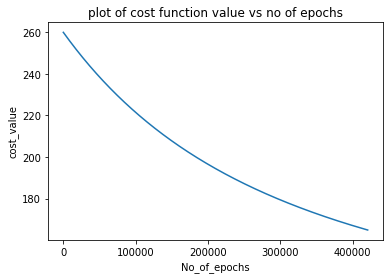

In [11]:
plt.plot(np.arange(epochs+1),np.array(cost_value))
plt.xlabel('No_of_epochs')
plt.ylabel('cost_value')
plt.title('plot of cost function value vs no of epochs')
plt.show()

#### Testing data

In [12]:
h_hat=np.zeros(np.array(X_test[Columns[0]]).size)
for i in range(M):
    h_hat += np.array(X_test[Columns[i]])*theta_values[i+1]
h_hat += theta_values[0]
h_hat=sigmoid(h_hat)
y_hat=np.array(y_test)

for i in range(len(h_hat)):
    tmp_value=h_hat[i]
    if tmp_value>=0.5:
        h_hat[i]=1
    else:
        h_hat[i]=0   

In [13]:
## decision boundary values.
C_intercept=(-1*theta_values[0])/theta_values[2]
m=(-1*theta_values[1])/theta_values[2]
x_min=int(df['Input feature 1'].min()-0.5)
x_max=int(df['Input feature 1'].max()+0.5)
x_axis=np.linspace(x_min,x_max,100)
y_axis=np.array([m*i+C_intercept for i in x_axis])

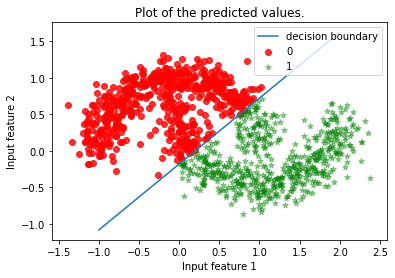

In [14]:
#This is the plot of after the predictions(after using logistic regression model.)
plt.scatter(X_test['Input feature 1'][h_hat==0.0], X_test['Input feature 2'][h_hat==0.0],color='red',marker='o',alpha=0.8,label='0')
plt.scatter(X_test['Input feature 1'][h_hat==1.0], X_test['Input feature 2'][h_hat==1.0],color='green',marker='*',alpha=0.4,label='1')
plt.plot(x_axis,y_axis,label='decision boundary')
plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')
plt.title('Plot of the predicted values.')
plt.legend()
plt.show()

In [15]:
### finding accuracy on tetsing data.
accur=0
for i in range(len(h_hat)):
    if h_hat[i]==y_hat[i]:
        accur+=1
    else:
        accur+=0
accur=accur/len(h_hat)
print(accur*100) 

80.80000000000001


## By scikit library method

In [16]:
#scikit library was used to built this model from which logistic regression was called.
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
predictions=log.predict(X_test)

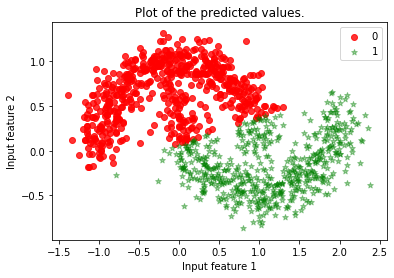

In [17]:
#This is the plot of after the predictions(after using logistic regression model.)
plt.scatter(X_test['Input feature 1'][predictions==0.0], X_test['Input feature 2'][predictions==0.0],color='red',marker='o',alpha=0.8,label='0')
plt.scatter(X_test['Input feature 1'][predictions==1.0], X_test['Input feature 2'][predictions==1.0],color='green',marker='*',alpha=0.4,label='1')
plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')
plt.title('Plot of the predicted values.')
plt.legend()
plt.show()

In [18]:
#This code gives us accuracy.
total=0
l=len(predictions)
y_test=np.array(y_test)
for i in range(l):
    if predictions[i]==y_test[i]:
        total += 1

accuracy_2=total/l
print(accuracy_2*100)     


86.84444444444445


As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.